In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Задание 1 (1.5 балла) 

В задании будем использовать датасет Petrol Consumption. 

Нужно считать таблицу, рассмотреть пары признаков. Найти среди них такие, которые
- имеют сильную положительную корреляцию 
- имеют отрицательную корреляцию
- слабо коррелируют друг с другом (коэффициент близок к нулю)

Сделайте выводы о зависимости найденных пар признаков. Комментарии оформляйте строго в ячейках формата Markdown.

In [3]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(
    path,
    delim_whitespace=True, header=None,
    names = [
        'mpg', 'cylinders', 'displacement',
        'horsepower', 'weight', 'acceleration',
        'model_year', 'origin', 'name'
    ],
    na_values='?',
)
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Удалим пропуски:

In [4]:
mpg_data = mpg_data.dropna()

Так как в семинаре рассматривалась корреляция между весом и потреблением топлива, то такую корреляцию рассматривать не будем (была сильно отрицательная корреляция)

Рассмотрим корреляцию между следующих пар: 
1. mpg and cylinders
2. mpg and displacement
3. mpg and horsepower
4. mpg and acceleration
5. mpg and model_year
6. mpg and origin
7. mpg and name
   И так для каждого параметра

Не знаю, что имеется в виду под столбцом origin, поэтому не понимаю как проводить корреляцию (не включаю столбец origin в код)

In [9]:
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.mpg, mpg_data.cylinders)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.mpg, mpg_data.displacement)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.mpg, mpg_data.horsepower)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.mpg, mpg_data.acceleration)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.mpg, mpg_data.model_year)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.cylinders, mpg_data.displacement)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.cylinders, mpg_data.horsepower)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.cylinders, mpg_data.acceleration)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.cylinders, mpg_data.model_year)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.displacement, mpg_data.horsepower)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.displacement, mpg_data.acceleration)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.displacement, mpg_data.model_year)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.horsepower, mpg_data.acceleration)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.horsepower, mpg_data.model_year)[0, 1])
print("Коэффициент корреляции: ", np.corrcoef(mpg_data.acceleration, mpg_data.model_year)[0, 1])




Коэффициент корреляции:  -0.7776175081260225
Коэффициент корреляции:  -0.8051269467104579
Коэффициент корреляции:  -0.7784267838977762
Коэффициент корреляции:  0.4233285369027873
Коэффициент корреляции:  0.5805409660907853
Коэффициент корреляции:  0.9508233008277827
Коэффициент корреляции:  0.8429833569186566
Коэффициент корреляции:  -0.5046833793486443
Коэффициент корреляции:  -0.34564744033808364
Коэффициент корреляции:  0.8972570018434692
Коэффициент корреляции:  -0.5438004967345673
Коэффициент корреляции:  -0.36985520667517924
Коэффициент корреляции:  -0.6891955103342366
Коэффициент корреляции:  -0.41636147709998855
Коэффициент корреляции:  0.2903161133365204


1. Мы наблюдаем сильную отрицательную корреляцию между скорость потребления топлива и объемом двигателя, это может значить, что чем больший объем двигателя у автомобиля, тем меньше будет его экономичность и высокая скорость потребления топлива. То есть, автомобиль с большим объемом двигателя будет тратить больше топлива на проезд определенного расстояния, чем автомобиль с меньшим объемом двигателя.
2. Сильная отрицательная корреляция между скоростью потребления топлива и перемещением означает, что при увеличении скорости потребления топлива, перемещение (или пройденное расстояние) будет уменьшаться. Другими словами, чем больше топлива расходуется за единицу времени, тем меньше расстояние, которое может быть преодолено за этот же промежуток времени. Например, если автомобиль тратит топлива очень быстро, то он не сможет проехать большое расстояние, даже если начинет двигаться.
3. Сильная отрицательная корреляция между скоростью потребления топлива и лошадинной силой означает, что чем выше лошадиная сила (мощность) двигателя автомобиля, тем меньше будет его скорость потребления топлива. Иными словами, автомобили с более мощными двигателями потребляют топлива менее эффективно, чем автомобили с менее мощными двигателями.
4. Положительная корреляция между mpg и ускорением означает, что чем быстрее будет двигаться автомобиль, тем больше будет расходываться топливо
5. Положительная корреляция между скоростью потребления топлива и годом выпуска машины означает, что с увеличением года выпуска машины, скорость потребления топлива также увеличивается. Это может быть вызвано различными факторами, такими как изменения в технологии двигателей, более тяжелые и мощные автомобили, а также более высокие скорости, что усложняет технические параметры.
6. Сильно положительная корреляция объема цилиндра от перемещения может означать, что чем дальше проедет автомобиль, тем меньше у него останется топлива
7. Сильно положительная корреляция между объемом цилиндра и лошадиной силой означает, что увеличение объема цилиндра обычно сопровождается увеличением лошадиных сил. Это значит, что автомобили с большим объемом цилиндра склонны иметь большую мощность, что в свою очередь обеспечивает им лучшую производительность. Однако стоит отметить, что есть и другие факторы, влияющие на лошадиные силы, как непосредственное увеличение количества цилиндров, системы надува и др.
8. Отрицательная корреляция между объемом цилиндра и ускорением означает, что увеличение объема цилиндра связано с уменьшением ускорения. Это может быть связано с тем, что автомобили с большим объемом цилиндра, как правило, имеют более мощные двигатели, которые, в свою очередь, могут оказывать большее сопротивление при ускорении из-за увеличенной массы или других факторов. Однако стоит помнить, что на ускорение влияют и другие параметры, такие как вес автомобиля, передаточные числа коробки передач, уровень трения и т. д.
9. Слабая отрицательная корреляция между объемом двигателя и годом выпуска модели автомобиля означает, что существует некоторая, но не очень сильная тенденция к уменьшению объема двигателя с течением времени. Это может указывать на то, что более новые модели автомобилей имеют склонность к уменьшению объема двигателя по сравнению с более старыми моделями.
Однако, такая слабая отрицательная корреляция может быть тоже вызвана различными факторами, такими как изменения в технологиях двигателей, более строгие стандарты по выбросам, развитие технологий в области эффективности двигателей и прочее.
10. Сильно положительная корреляция между перемещением (объемом) двигателя и лошадиной силой автомобиля означает, что чем больше объем двигателя (в литрах или кубических дюймах), тем выше мощность (в лошадиных силах) данного двигателя. Другими словами, автомобили с более большим объемом двигателя обычно имеют более высокую мощность.

11.Отрицательная корреляция между перемещением (пройденным путем) и ускорением автомобиля означает, что при увеличении значения одной переменной (например, ускорения), значение другой переменной (пройденного пути) уменьшается. Другими словами, чем больше ускорение автомобиля, тем меньше пройденное им расстояние за определенное время.
Обычно это может происходить в ситуации, когда движение автомобиля более замедленное, например, в случае торможения или движения против ветра. Например, если автомобиль движется с высоким ускорением, но затем происходит резкое замедление или торможение, то это может привести к отрицательной корреляции между пройденным путем и ускорение
12. У перемещения и года выпуска отрицательная корреляция. Это может иметь экономическое или техническое объяснение: старые модели автомобилей могут иметь более изношенные двигатели, менее эффективные системы топливоподачи, а также менее передовые технологии, приводящие к уменьшенной производительности и, как следствие, уменьшенному пройденному пути.
13. Между лошадинной силой и ускорением имеется сильная отрицательная корреляция. Это может быть объяснено тем, что автомобили с большей лошадиной силой могут чаще быть более мощными и тяжелыми, что в свою очередь замедляет их ускорение. Тогда как автомобили с меньшей лошадиной силой могут быть легче и/или иметь более эффективную передачу мощности, что в конечном итоге позволяет им быстрее ускоряться.
14. Лошадинная сила и год выпуска модели имеют отрицательную корреляцию. В контексте автомобилей это могло бы означать, что более старые автомобили имеют большую мощность, чем более новые автомобили, что в принципе является необычным. На практике это не соответствует реальности, так как обычно в отрасли автомобильной промышленности новые модели автомобилей имеют более современные и эффективные двигатели с большей лошадиной силой, по сравнению с более старыми моделями.
Возможно, в этом случае отрицательная корреляция между этими двумя переменными могла быть вызвана какими-то другими факторами, которые не учитываются в данной модели. Это могут быть внешние влияния, такие как экономические тенденции, изменения в потребительских предпочтениях, развитие технологий и т.
15.Ускорение и год выпуска имеют слабую корреляцию. Слабая корреляция между ускорением автомобиля и годом выпуска означает, что существует некоторая, но не очень сильная связь между этими двумя переменными. В контексте автомобилей это может указывать на то, что старые и новые автомобили могут иметь сходные показатели ускорения, без значительной зависимости от года выпуска. 
Такая слабая корреляция может быть вызвана различными факторами, такими как технические изменения в автомобильной промышленности, различные модели автомобилей, изменения в условиях тестирования ускорения и т.д.д.
м. 

## Задание 2 (1.5 балла) 

Визуализировать на графиках пары признаков, найденные в каждом подпункте прошлого задания.
Подписать оси (названия признаков).

Correlation of X and Y:  -0.7776175081260225


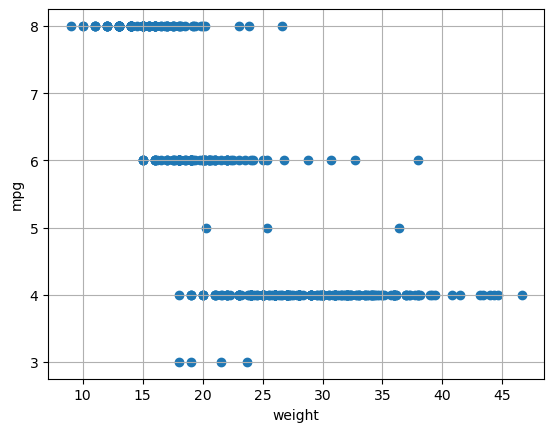

In [22]:
X = mpg_data.mpg
Y = mpg_data.cylinders

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()


Correlation of X and Y:  -0.8051269467104579


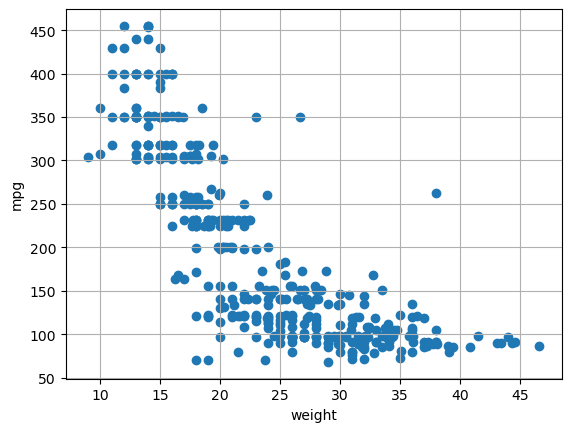

In [23]:
X = mpg_data.mpg
Y = mpg_data.displacement

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()


Correlation of X and Y:  -0.7784267838977762


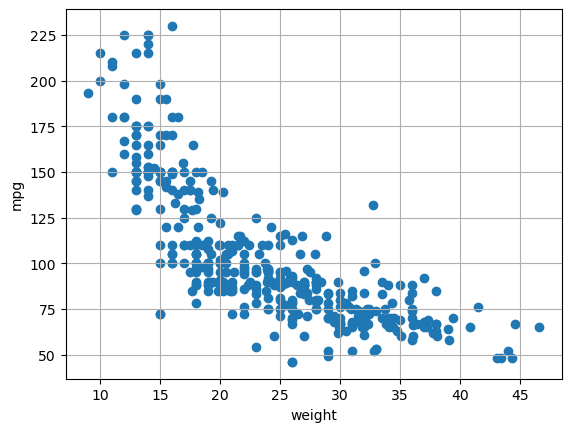

In [24]:
X = mpg_data.mpg
Y = mpg_data.horsepower

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  0.4233285369027873


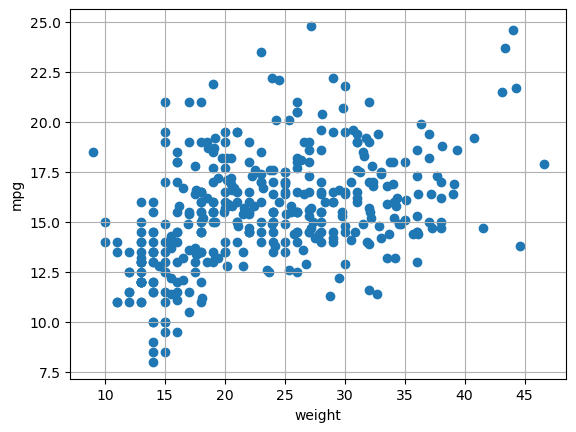

In [25]:
X = mpg_data.mpg
Y = mpg_data.acceleration

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  0.5805409660907853


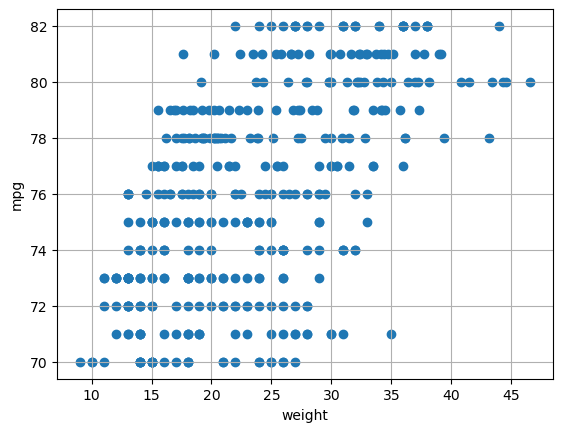

In [26]:
X = mpg_data.mpg
Y = mpg_data.model_year

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  0.9508233008277827


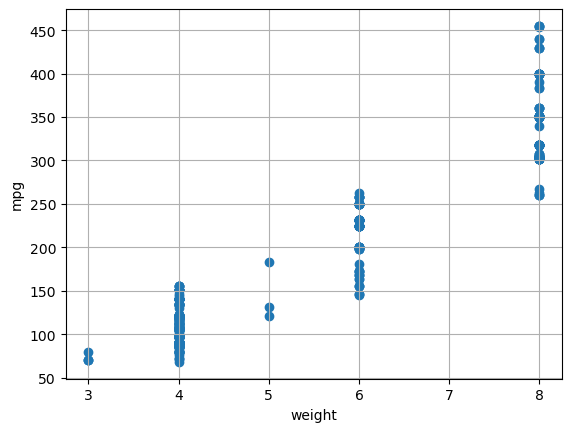

In [27]:
X = mpg_data.cylinders
Y = mpg_data.displacement

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  0.8429833569186566


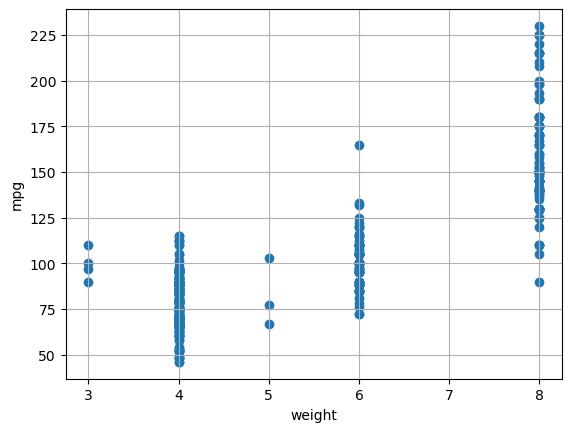

In [28]:
X = mpg_data.cylinders
Y = mpg_data.horsepower

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  -0.5046833793486443


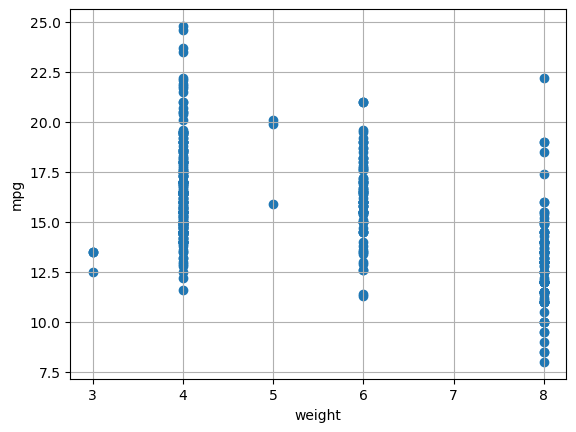

In [29]:
X = mpg_data.cylinders
Y = mpg_data.acceleration

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  -0.34564744033808364


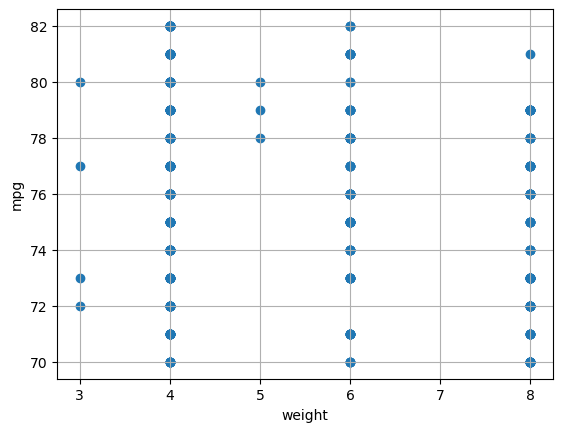

In [30]:
X = mpg_data.cylinders
Y = mpg_data.model_year

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  0.8972570018434692


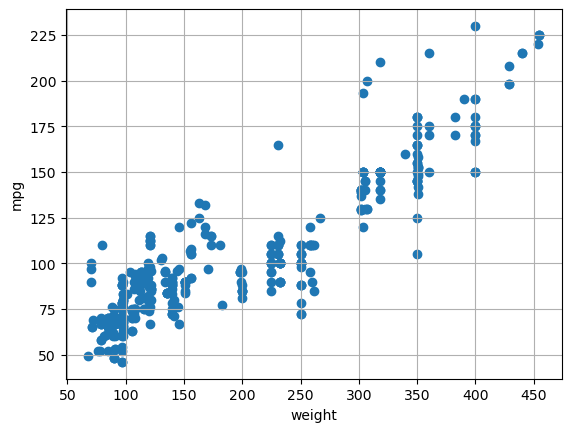

In [31]:
X = mpg_data.displacement
Y = mpg_data.horsepower

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  -0.5438004967345673


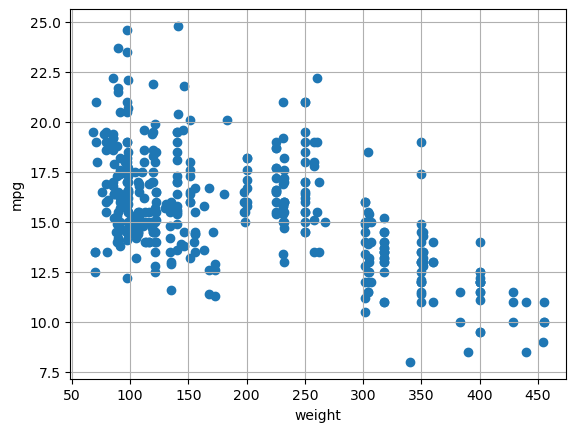

In [32]:
X = mpg_data.displacement
Y = mpg_data.acceleration

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  -0.36985520667517924


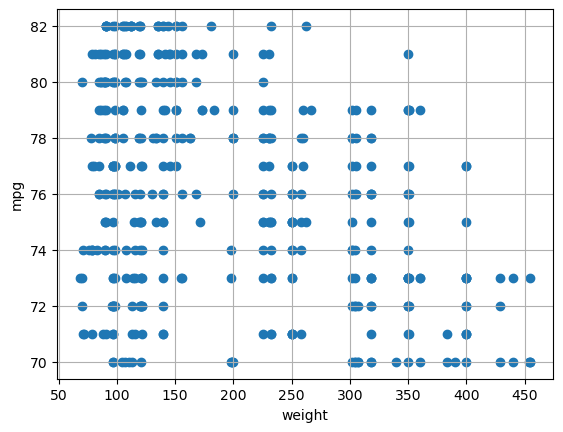

In [33]:
X = mpg_data.displacement
Y = mpg_data.model_year

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  -0.6891955103342366


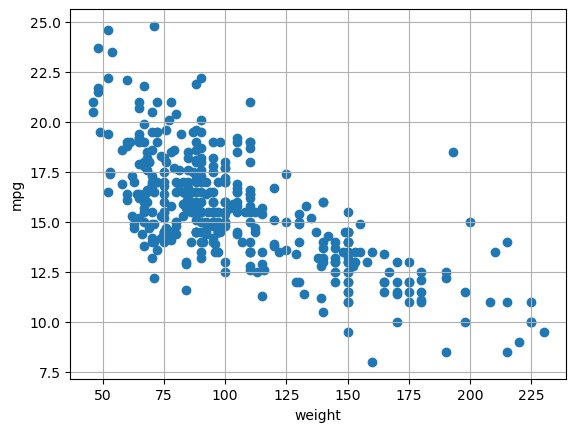

In [34]:
X = mpg_data.horsepower
Y = mpg_data.acceleration

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  -0.41636147709998855


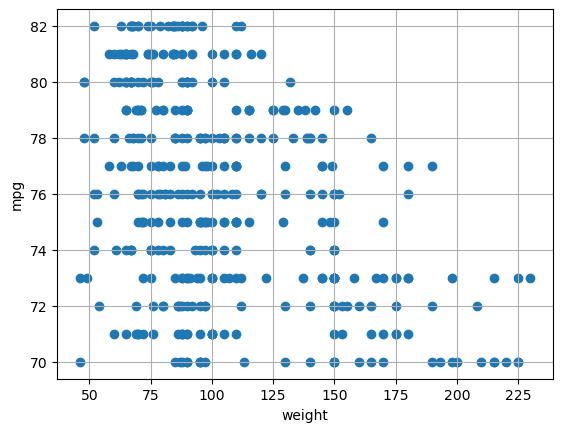

In [37]:
X = mpg_data.horsepower
Y = mpg_data.model_year

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

Correlation of X and Y:  0.2903161133365204


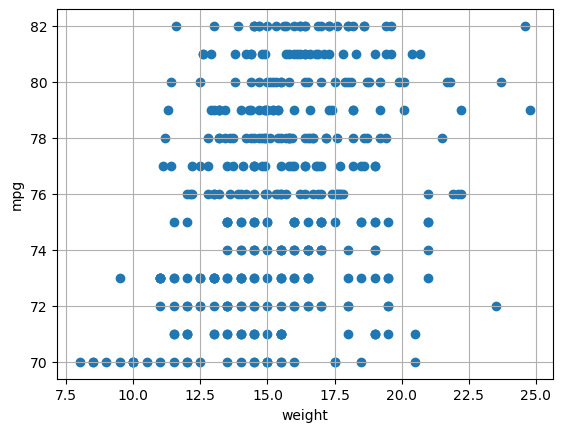

In [36]:
X = mpg_data.acceleration
Y = mpg_data.model_year

print('Correlation of X and Y: ', np.corrcoef(X, Y)[0, 1])

plt.scatter(X,Y)
plt.grid()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()